In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [54]:
# Load the data from the CSV file

output_directory = './img/'
df = pd.read_csv('extracted_values.csv')
datetime = "Scenario 1 - 03-11-23"

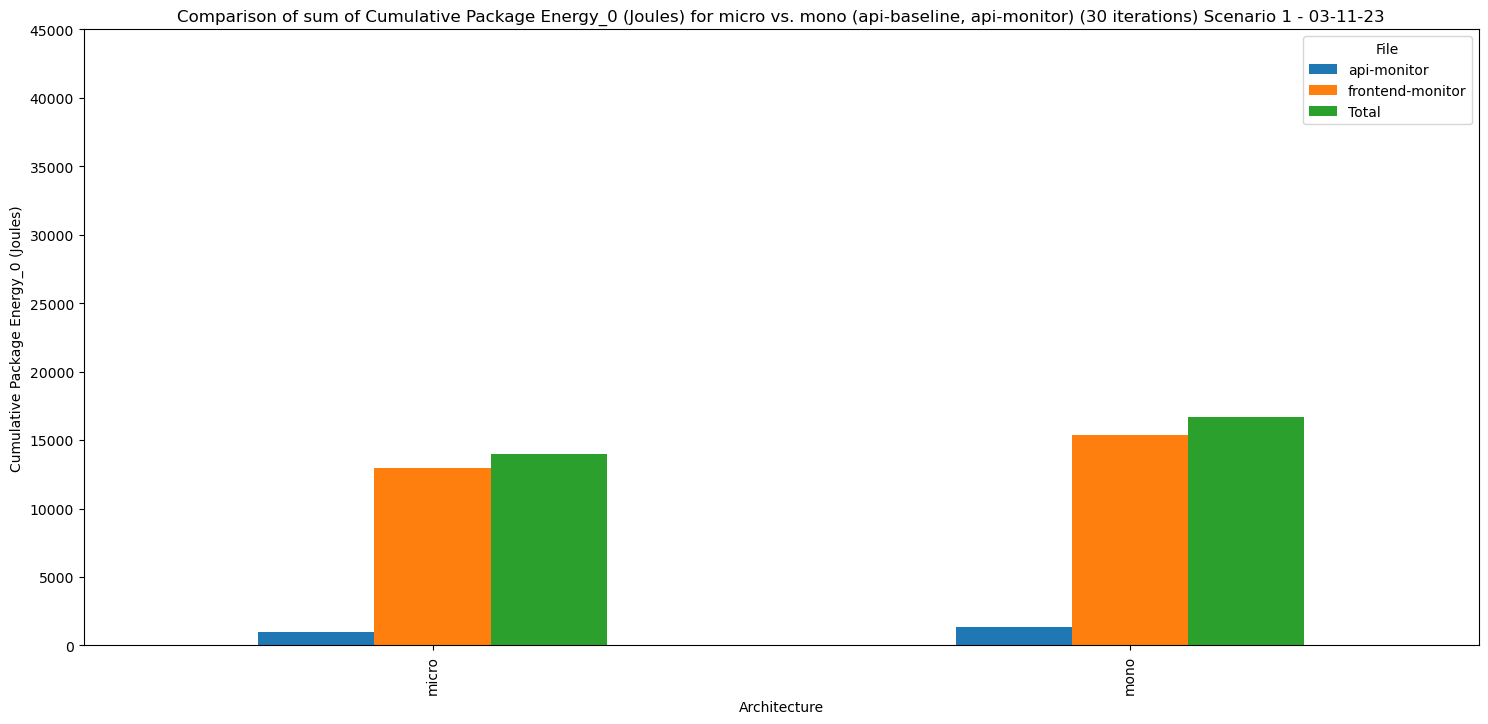

In [55]:
# Filter the DataFrame to include only "api-baseline" and "api-monitor"
filtered_df = df[df["File"].isin(["frontend-monitor", "api-monitor"])]

# Group the filtered DataFrame by "Architecture" and "File" and sum the values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].sum().unstack(fill_value=0)

# Calculate the total of "api-baseline" and "api-monitor"
grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# Plot a bar chart for each "micro" and "mono"
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Cumulative Package Energy_0 (Joules)")
plt.title("Comparison of sum of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (30 iterations) " + datetime)
plt.legend(title="File")
# limit y axis
plt.ylim(0, 45000)
# plt.ylim(0, 16700)

# plt.show()
# 2700

plt.savefig(os.path.join(output_directory, 'sum' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

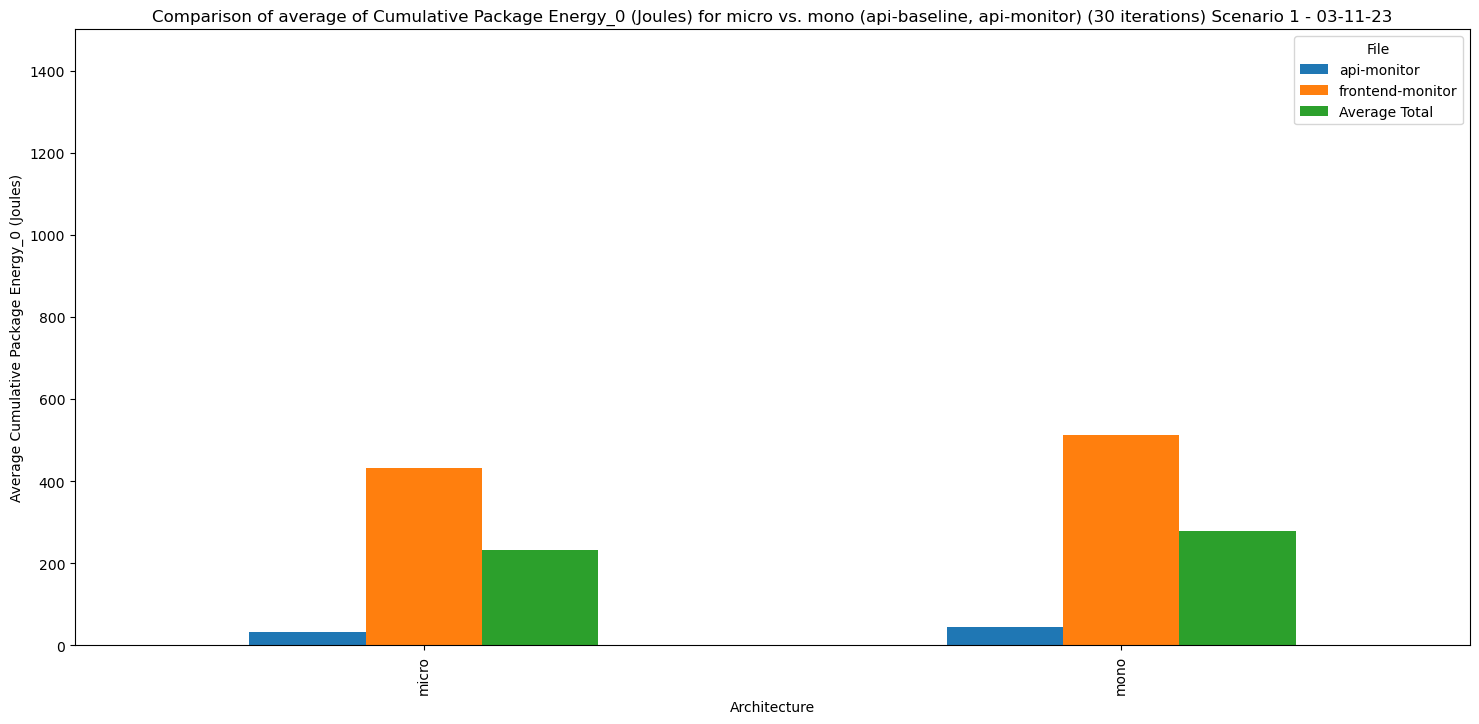

In [56]:
# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
# filtered_df = df[df["DateTime"] == "19-09-23T19-32-10"]

# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = filtered_df[~filtered_df["File"].str.contains("baseline")]

# Group the filtered DataFrame by "Architecture" and "File" and calculate the average values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].mean().unstack(fill_value=0)

# Calculate the average total energy consumption for each architecture
grouped_df["Average Total"] = grouped_df.mean(axis=1)

# Plot a bar chart for each "micro" and "mono" including the average total
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Average Cumulative Package Energy_0 (Joules)")
plt.title("Comparison of average of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (30 iterations) " + datetime)
plt.legend(title="File")

plt.ylim(0, 1500)

plt.savefig(os.path.join(output_directory, 'average' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

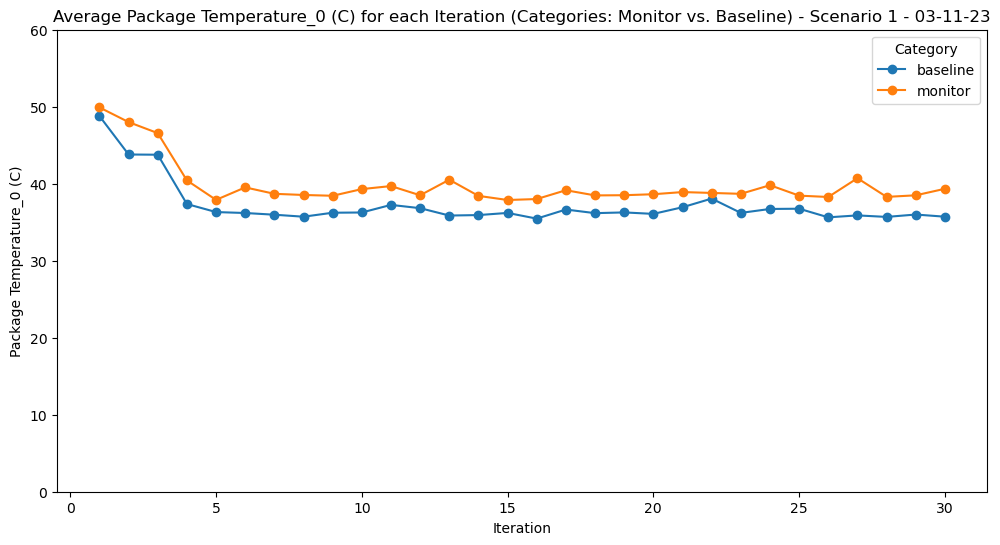

In [57]:
# Extract the category ("baseline" or "monitor") based on the "File" column
df["Category"] = df["File"].apply(lambda x: "baseline" if "baseline" in x else "monitor")

# Extract the component ("API" or "frontend") based on the "File" column
df["Component"] = df["File"].str.split("-").str[1]

# Group by "#", "Category", and "Component" and sum the " Package Temperature_0 (C)" values
grouped_df = df.groupby(["#", "Category", "Component"])[" Package Temperature_0 (C)"].mean().reset_index()

# Pivot the grouped data to create separate columns for "monitor" and "baseline" categories
pivoted_df = grouped_df.pivot_table(index="#", columns="Category", values=" Package Temperature_0 (C)", aggfunc="mean")

# Plot a line chart for "monitor" and "baseline" Package Temperature_0 (C) at each unique iteration
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Average Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - " + datetime)

plt.legend(title="Category")

plt.ylim(0, 60)

plt.savefig(os.path.join(output_directory, 'average_temp' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

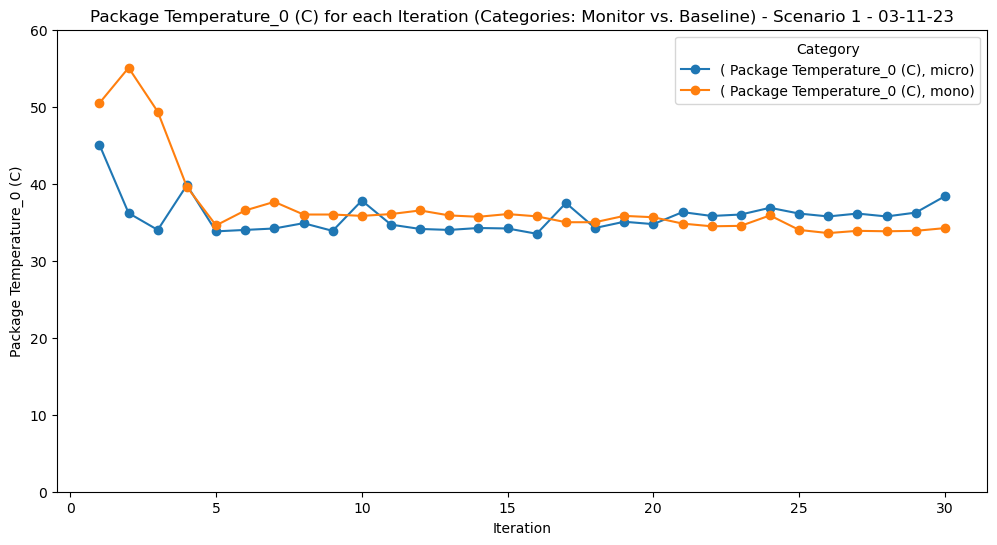

In [58]:
filtered_df = df[~df["File"].str.contains("baseline")]
filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]


pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values=" Package Temperature_0 (C)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - " + datetime)
plt.legend(title="Category")

plt.ylim(0, 60)

plt.savefig(os.path.join(output_directory, 'sum_temp' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

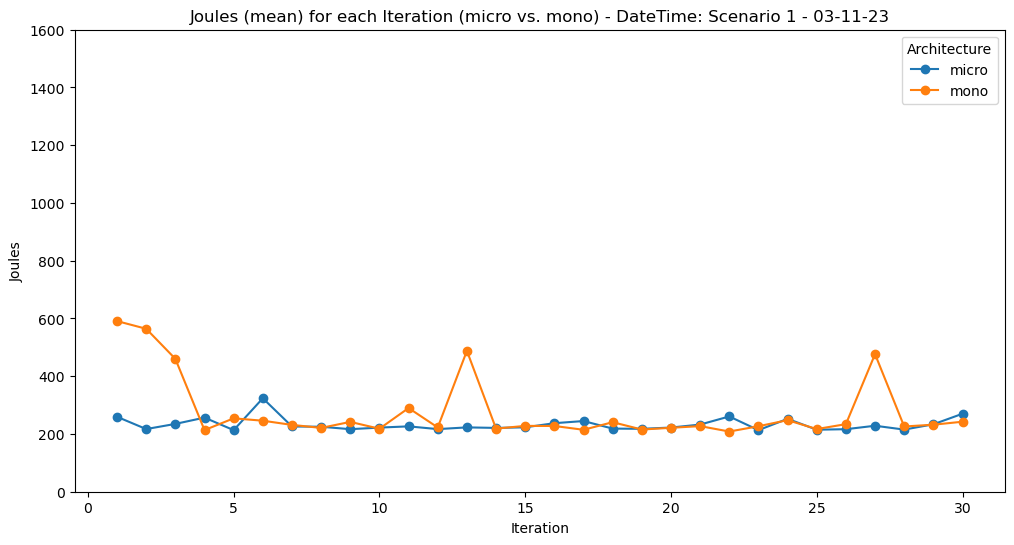

In [59]:
filtered_df = df[~df["File"].str.contains("baseline")]

pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (Joules)", aggfunc="mean").unstack()
pivoted_df.columns = ["micro", "mono"]

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Joules")

plt.ylim(0,1600)


plt.title("Joules (mean) for each Iteration (micro vs. mono) - DateTime: " + datetime)
plt.legend(title="Architecture")
# plt.show()

plt.savefig(os.path.join(output_directory, 'energy' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()